# Estudo das variáveis categóricas de um conjunto de dados

#### https://www.kaggle.com/uciml/adult-census-income ( link para o conjunto de dados )

# Importando as biliotecas necessárias para a análise de dados

In [682]:
import pandas as pd

# Lendo o arquivo de dados

In [683]:
dados = pd.read_csv('dados/adult.csv')
dados

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


## É muito importante darmos uma olhada nas informações básicas dos dados, nesta etapa identificamos a quantidade de registros não-nulos, a quantidade total de registros, os tipos de variáveis, dentre outras informações

In [684]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


# Calculando a frequência de homens e mulheres no dataset

In [685]:
frequencia = dados.sex.value_counts()
frequencia

Male      21790
Female    10771
Name: sex, dtype: int64

# Calculando a porcentagem relativa a homens e mulheres no dataset

In [686]:
porcentagem = dados.sex.value_counts(normalize = True)*100
porcentagem

Male      66.920549
Female    33.079451
Name: sex, dtype: float64

# Montando a tabela de frequencia com a variável sexo

In [687]:
tab_freq_sex = pd.DataFrame({'frequencia': frequencia , 'porcentagem': porcentagem})

In [688]:
tab_freq_sex

,frequencia,porcentagem
Male,21790,66.920549
Female,10771,33.079451


In [689]:
### tab_freq_sex = pd.crosstab(dados.sex, dados.race)

## Renomeando a coluna Sexo

In [690]:
tab_freq_sex.rename_axis('Sexo', axis = 'columns', inplace = True)

In [691]:
tab_freq_sex

Sexo,frequencia,porcentagem
Male,21790,66.920549
Female,10771,33.079451


## Traduzindo o nome das linhas

In [692]:
tab_freq_sex.rename(index = {'Male': 'Masculino', 'Female': 'Feminino'}, inplace=True)
tab_freq_sex

Sexo,frequencia,porcentagem
Masculino,21790,66.920549
Feminino,10771,33.079451


## Criando uma tabela de frequencia com distribuição de sexo e cor, mas agora usando o método crosstab
### Poderíamos fazer conforme feito acima mas o método crosstab é mais prático e elegante

In [693]:
tab_freq_sex_cor = pd.crosstab(dados.sex, dados.race)
tab_freq_sex_cor

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,119,346,1555,109,8642
Male,192,693,1569,162,19174


In [694]:
tab_freq_sex_cor.rename(index = {'Male': 'Masculino', 'Female': 'Feminino'}, inplace=True)
tab_freq_sex_cor

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Feminino,119,346,1555,109,8642
Masculino,192,693,1569,162,19174


## Para renomear as colunas e traduzi-las, precisamos criar um dicionário com os valores que queremos que sejam substituídos

In [695]:
cor = {'Amer-Indian-Eskimo': 'Nativo_Americano',
      'Asian-Pac-Islander' : 'Asiático',
      'Black' : 'Negra',
      'Other':'Outros', 
      'White':'Branca' }

In [696]:
cor

{'Amer-Indian-Eskimo': 'Nativo_Americano',
 'Asian-Pac-Islander': 'Asiático',
 'Black': 'Negra',
 'Other': 'Outros',
 'White': 'Branca'}

## Passamos agora o dicionario que vai mudar os nomes das colunas

In [697]:
tab_freq_sex_cor.rename(columns = cor, inplace = True)
tab_freq_sex_cor


race,Nativo_Americano,Asiático,Negra,Outros,Branca
sex,,,,,
Feminino,119,346,1555,109,8642
Masculino,192,693,1569,162,19174


## Para traduzir a tag da coluna sexo, usamos o argumento 'ROW' no lugar de 'columns'

In [698]:
tab_freq_sex_cor.rename_axis('Sexo', axis = 'rows', inplace = True)
tab_freq_sex_cor

race,Nativo_Americano,Asiático,Negra,Outros,Branca
Sexo,,,,,
Feminino,119,346,1555,109,8642
Masculino,192,693,1569,162,19174


In [699]:
tab_freq_sex_cor.rename_axis('Raça', axis = 'columns', inplace = True)
tab_freq_sex_cor  ## traduzindo i indice das colunas

Raça,Nativo_Americano,Asiático,Negra,Outros,Branca
Sexo,,,,,
Feminino,119,346,1555,109,8642
Masculino,192,693,1569,162,19174


# Criando a tabela porcentagem

In [700]:
tab_porc_sex_cor = pd.crosstab(dados.sex, dados.race, normalize = True).round(4)*100
tab_porc_sex_cor

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
sex,,,,,
Female,0.37,1.06,4.78,0.33,26.54
Male,0.59,2.13,4.82,0.50,58.89


In [701]:
tab_porc_sex_cor.rename(columns = cor, inplace = True)
tab_porc_sex_cor.rename_axis('Sexo', axis = 'rows', inplace = True)
tab_porc_sex_cor.rename_axis('Raça', axis = 'columns', inplace = True)
tab_porc_sex_cor


Raça,Nativo_Americano,Asiático,Negra,Outros,Branca
Sexo,,,,,
Female,0.37,1.06,4.78,0.33,26.54
Male,0.59,2.13,4.82,0.50,58.89


## Gerando o primeiro gráfico simples, vamos investigar a proporção de pessoas em cada classe de renda ( A ou B)

### Fiz uma pequena alteração na coluna 'income' , fiz renda menor que 50K = classe B e renda maior que 50K  = classe A

In [702]:
dados['income']=dados['income'].replace("<=50K",'B').replace(">50K",'A')


In [703]:
dados.income.value_counts()

B    24720
A     7841
Name: income, dtype: int64

## Importando o matplotlib para plotarmos os gráficos

In [704]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('figure', figsize = (12,6))

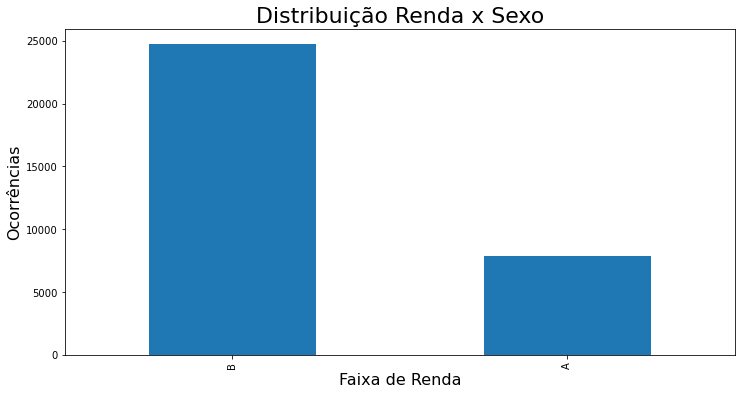

In [705]:
renda_sexo = dados["income"].value_counts().plot(kind="bar")
renda_sexo.set_ylabel('Ocorrências',{'fontsize': 16})
renda_sexo.set_xlabel('Faixa de Renda',{'fontsize': 16})
renda_sexo.set_title('Distribuição Renda x Sexo', {'fontsize': 22})    

plt.show() ## esconde a legenda " <AxesSubplot:>" do gráfico

# Vamos agora trabalhar com os dados de idade:

### Gostaríamos aqui de separar as várias idades que temos no nosso dataset em faixas etárias. 
### Para tanto precisamos identificar os valores mínimos e máximos da coluna idade e separar em intervalos
### mais ou menos iguais.
### É preciso também identificar a quantidade de registros únicos que temos nesta coluna.


In [706]:
dados.age.min()

17

In [707]:
dados.age.max()

90

In [708]:
dados.age.value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
86      1
87      1
Name: age, Length: 73, dtype: int64

## Como eu pensei?: Dividir o intervalo de dados únicos em partes iguais, foram então criados os intervalos de 0 a 17 anos, de 17 a 31, de 31 a 45.......Poderia ser feito pela  Regra de Sturges mas eu achei que a quantidade de classes ia ficar muito grande k = 16.


In [709]:
# import numpy as np

In [710]:
# n = dados.shape[0]
# n

In [711]:
# k = 1 + (10/3)*np.log10(n)
# k

## para cada intervalo foi atribuído um rótulo (label) qualquer de classificação etéria.

In [712]:
faixa_etaria = [0,17,31,45,59,73,90]
rotulos = ['Jovem', 'Adulto', 'Meia_Idade', 'Maduro', 'Idoso','Ancião']

In [713]:
pd.cut(x= dados.age, bins = faixa_etaria, labels = rotulos)

0            Ancião
1            Ancião
2             Idoso
3            Maduro
4        Meia_Idade
            ...    
32556        Adulto
32557        Adulto
32558    Meia_Idade
32559        Maduro
32560        Adulto
Name: age, Length: 32561, dtype: category
Categories (6, object): ['Jovem' < 'Adulto' < 'Meia_Idade' < 'Maduro' < 'Idoso' < 'Ancião']

## Vamos atribuir a essa série, uma variável qualquer "classificacao_idade"

In [714]:
classificacao_idade = pd.cut(x= dados.age, bins = faixa_etaria, labels = rotulos)
classificacao_idade

0            Ancião
1            Ancião
2             Idoso
3            Maduro
4        Meia_Idade
            ...    
32556        Adulto
32557        Adulto
32558    Meia_Idade
32559        Maduro
32560        Adulto
Name: age, Length: 32561, dtype: category
Categories (6, object): ['Jovem' < 'Adulto' < 'Meia_Idade' < 'Maduro' < 'Idoso' < 'Ancião']

## Se fizermos um value_counts(), podemos ver a porcentagem de pessoas em cada faixa etária que criamos e podemos mostrar em forma de gráfico

Text(0.5, 1.0, 'Distribuição Pessoas x Faixa etária')

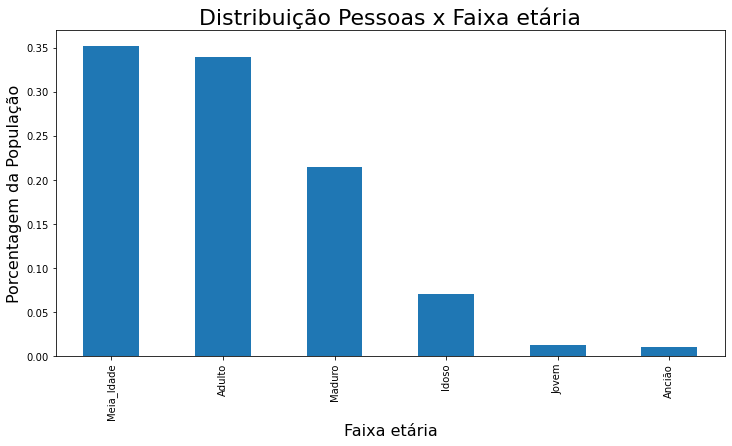

In [715]:
f_etária = classificacao_idade.value_counts(normalize= True).plot(kind = 'bar')
f_etária.set_ylabel('Porcentagem da População',{'fontsize': 16})
f_etária.set_xlabel('Faixa etária',{'fontsize': 16})
f_etária.set_title('Distribuição Pessoas x Faixa etária', {'fontsize': 22})    



# Uma forma de plotarmos todos os graficos de variáveis categóricas e numéricas de uma vez, é separa-las em listas e fazer list compreh. com as mesmas. Uma lista vai conter as variáveis tipo "object" e a outra as variáveis numéricas:


In [716]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [717]:
cat_var = [x for x in dados.columns if dados[x].dtype=="O"] ## variáveis tipo objeto
print(cat_var)
num_var = [x for x in dados.columns if x not in cat_var]
print(num_var)

['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']
['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss', 'hours.per.week']


In [718]:
cat_var

['workclass',
 'education',
 'marital.status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native.country',
 'income']

# Para mostrar as variáveis em relação ao total de pessoas do conjunto de dados

In [719]:
for i in cat_var:
    print("<<<<<<"+i+">>>>>>")
    print(dados[i].value_counts(), end = "\n")
    print("\n")

<<<<<<workclass>>>>>>
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64


<<<<<<education>>>>>>
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64


<<<<<<marital.status>>>>>>
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital.status, dtype: int64


<<<<<<occupation>>>>>>
Pr

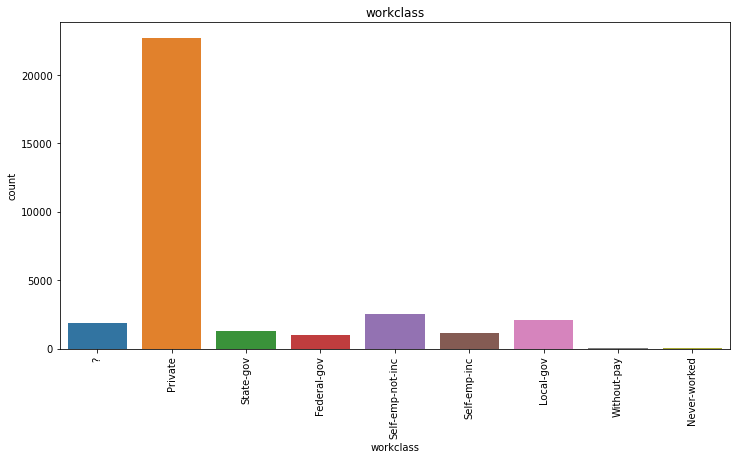

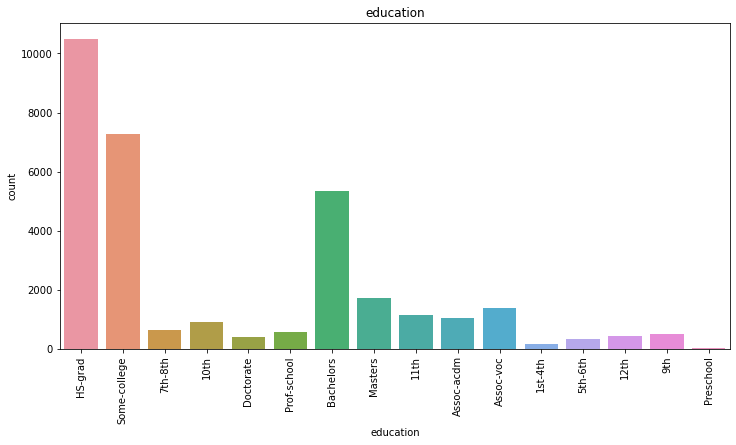

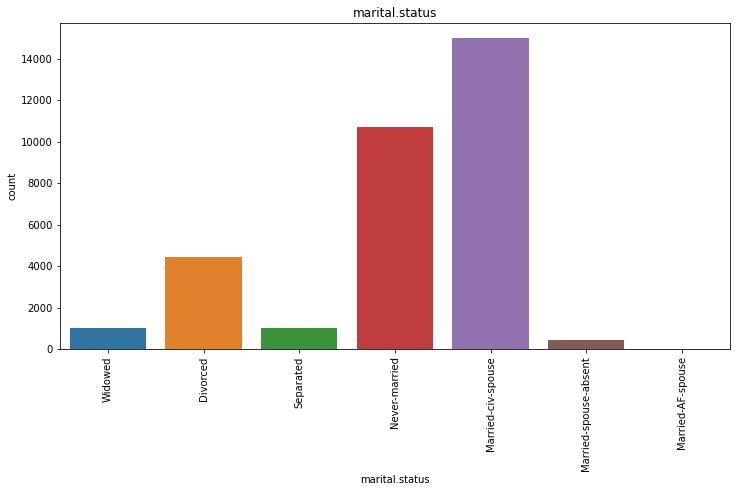

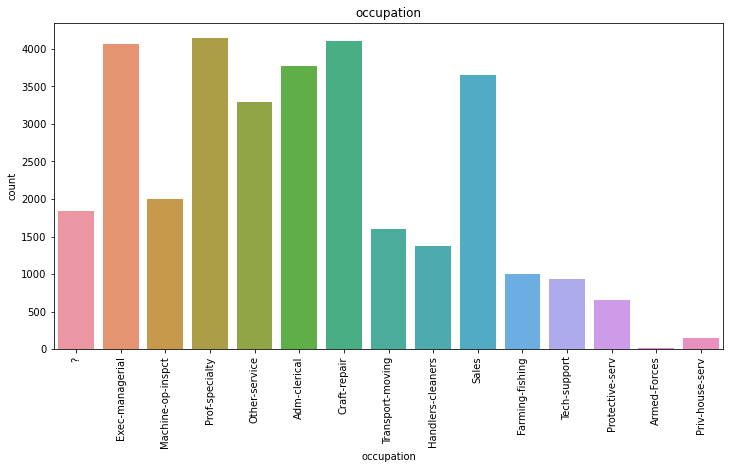

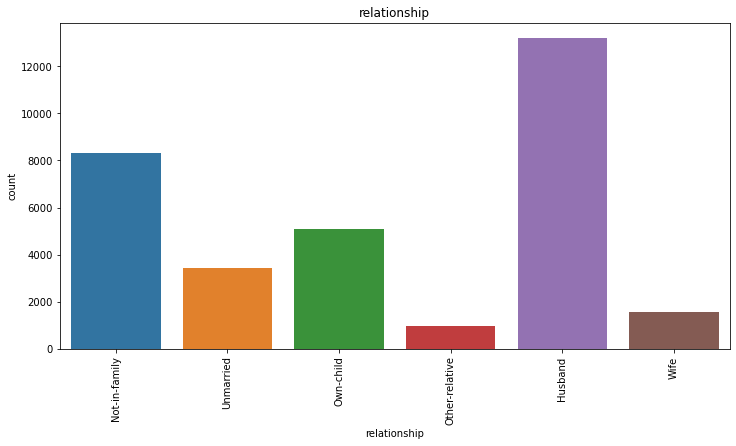

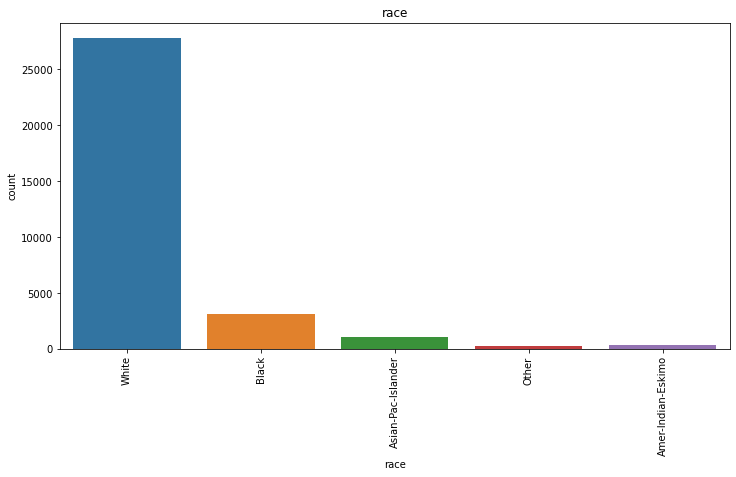

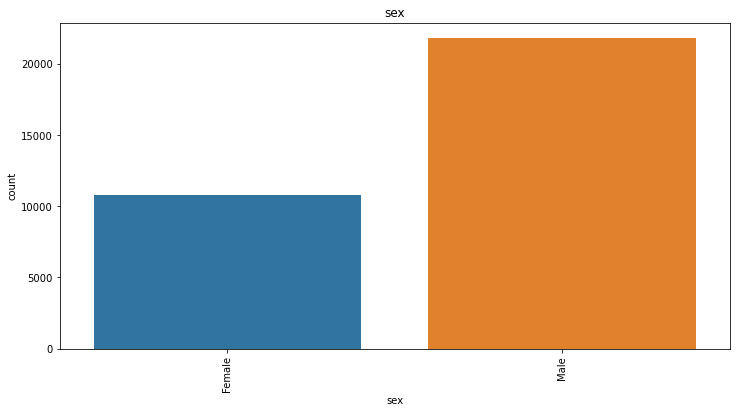

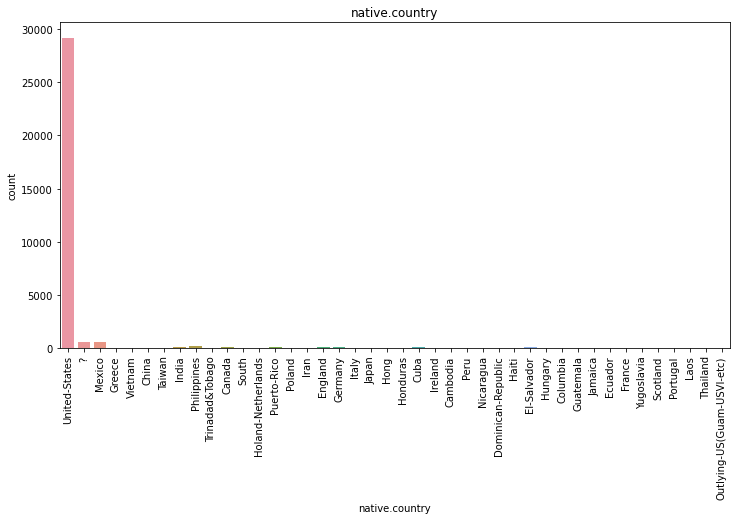

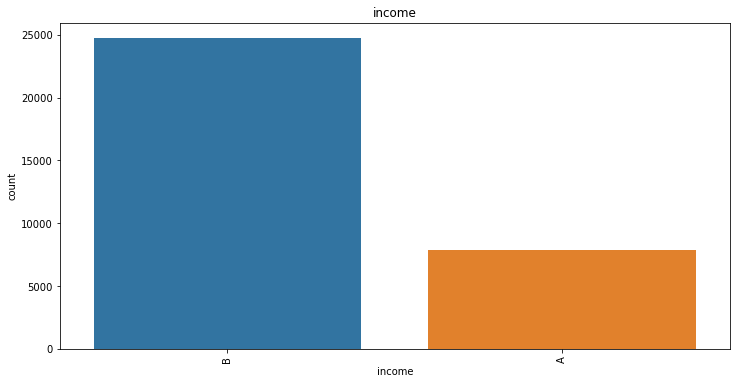

In [720]:
for i in cat_var:
    plt.title(i)
    sns.countplot(x = dados[i])
    
    plt.xticks(rotation = 90)
    plt.show()
    

# Para melhorar esses gráficos, podemos excluir ou modificar os dados com "?" ,  também podemos agrupar as outras nacionalidades como não-americanos e ficarmos com dois grupos ( Americanos e não americanos)

# vamos substituir os valores "?" por valores " other " 

In [721]:
dados = dados.replace('?', 'others')

In [722]:
dados['native.country'] = np.where((dados['native.country']== 'United-States'), 'usa', 'non-usa')

# vamos aproveitar e analiar os mesmos graficos mas agora em relação a variável "income" ( renda ) 

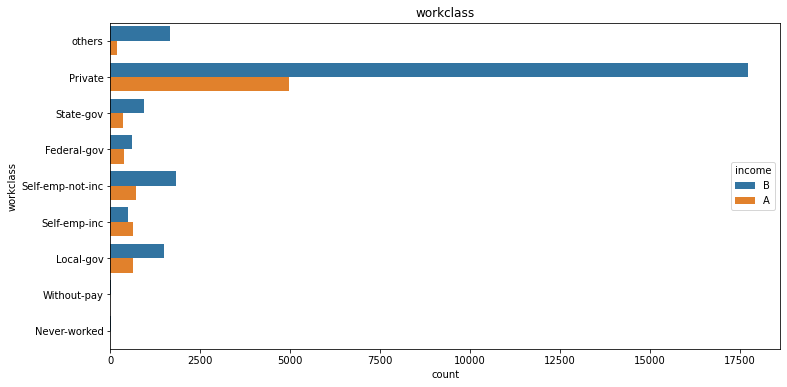

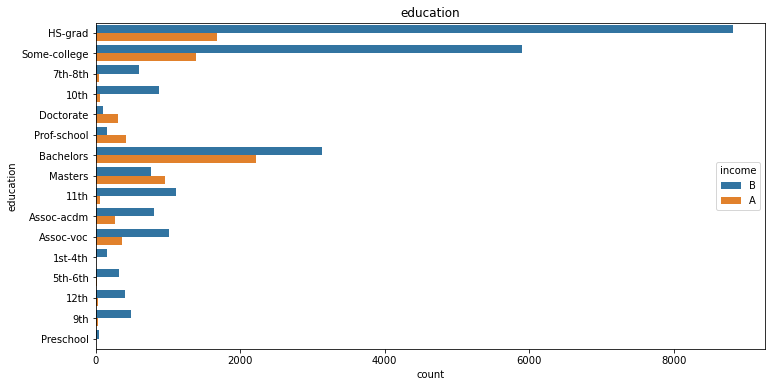

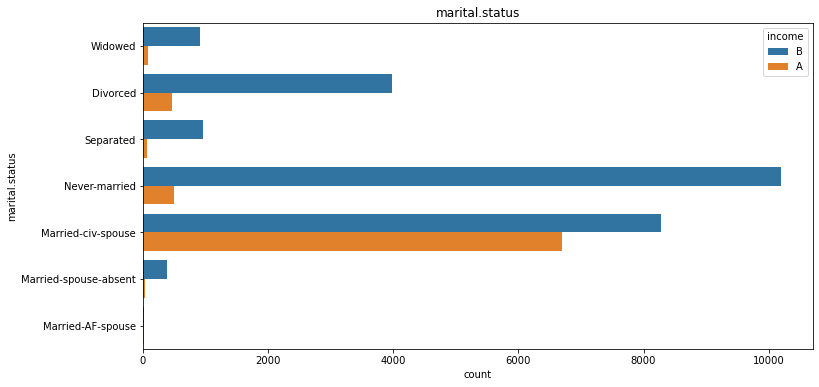

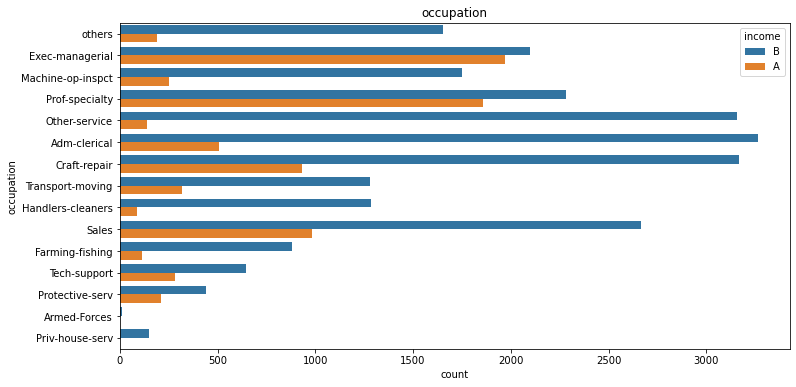

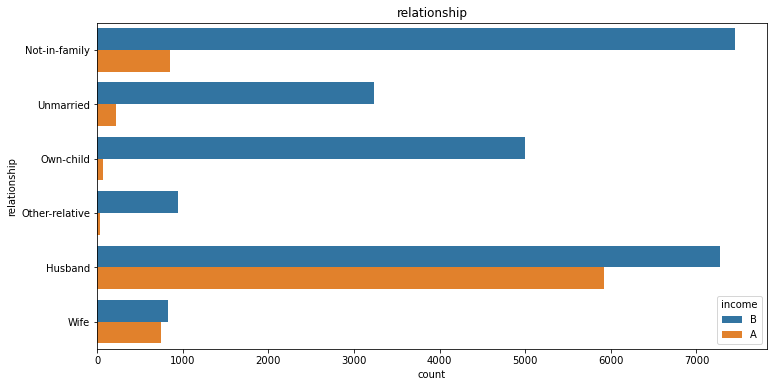

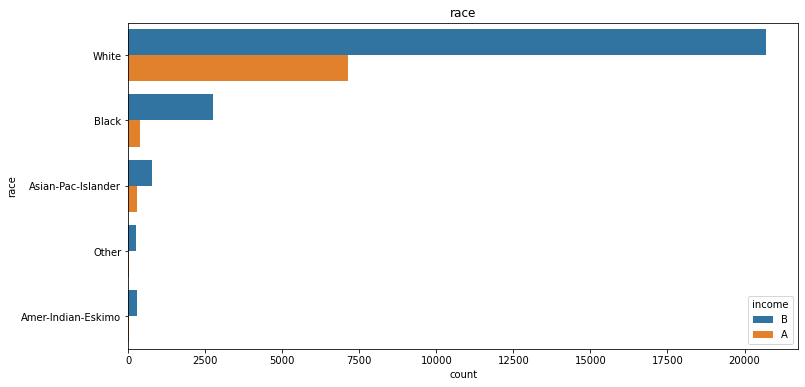

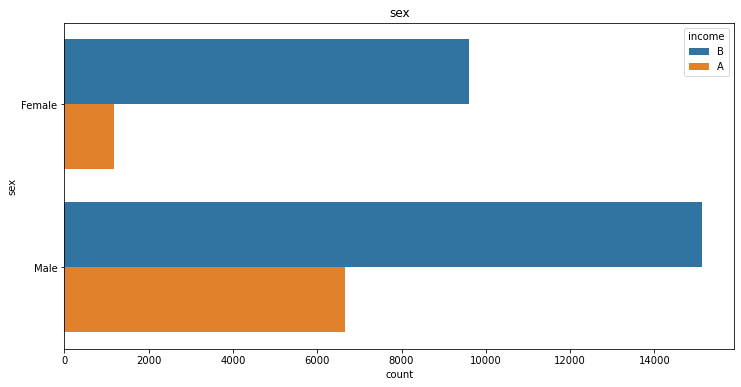

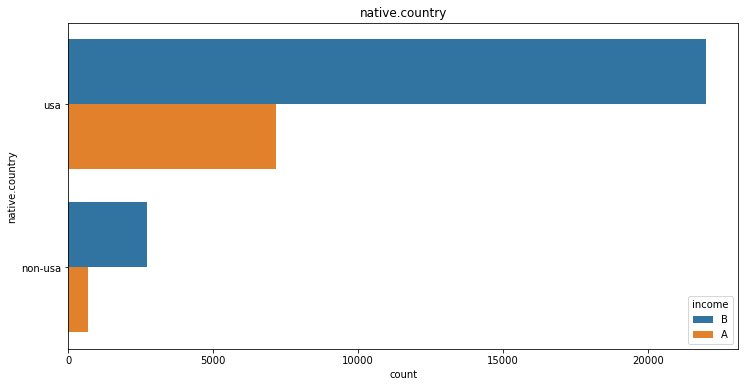

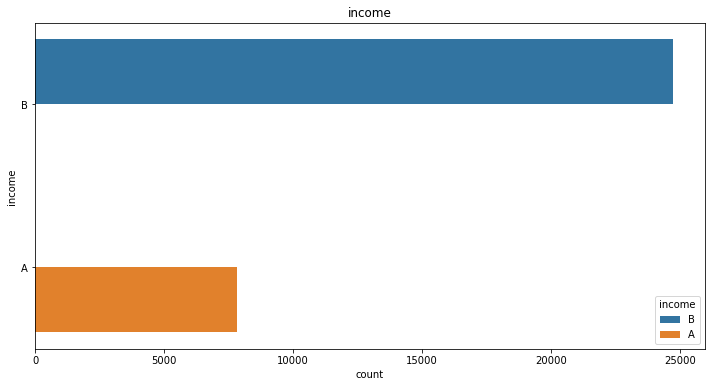

In [723]:
for i in cat_var:
    plt.title(i)
    sns.countplot(y = dados[i], hue = dados['income'])
    
    plt.xticks(rotation = 0)
    plt.show()
    

# Vamos agora analisar a os dados de educação em relação a cor das pessoas 

In [724]:
tab_freq_edu_cor = pd.crosstab(dados['education.num'], dados.race)
tab_freq_edu_cor

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
education.num,,,,,
1,0,6,5,2,38
2,4,5,16,9,134
3,2,18,21,13,279
4,9,11,56,17,553
5,5,9,89,8,403
6,16,13,133,9,762
7,14,21,153,10,977
8,5,9,70,14,335
9,119,226,1174,78,8904


Text(0.5, 0, 'Nível_Educacional')

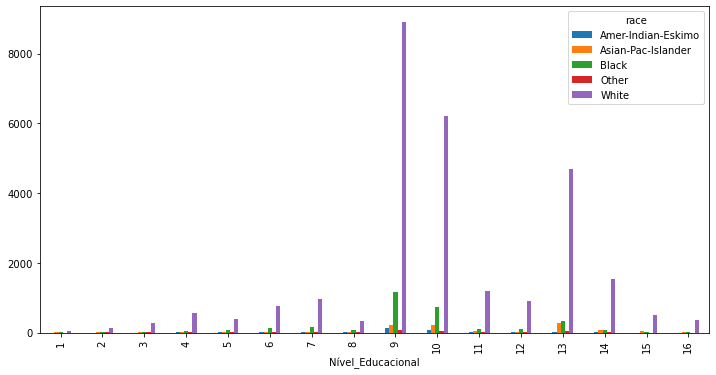

In [725]:
tab_freq_edu_cor.plot(kind = 'bar')
plt.xlabel('Nível_Educacional')


#  Vamos agora analisar a os dados matrimoniais em relação a cor das pessoas 

In [726]:
tab_freq_mat_cor = pd.crosstab(dados['marital.status'], dados.race, normalize = True).round(4)*100
tab_freq_mat_cor

race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
marital.status,,,,,
Divorced,0.18,0.23,1.49,0.08,11.66
Married-AF-spouse,0.00,0.00,0.00,0.00,0.07
Married-civ-spouse,0.36,1.56,2.57,0.32,41.18
Married-spouse-absent,0.03,0.13,0.19,0.05,0.89
Never-married,0.32,1.14,4.13,0.32,26.89
Separated,0.03,0.06,0.81,0.04,2.20
Widowed,0.04,0.07,0.39,0.02,2.52


<AxesSubplot:xlabel='marital.status'>

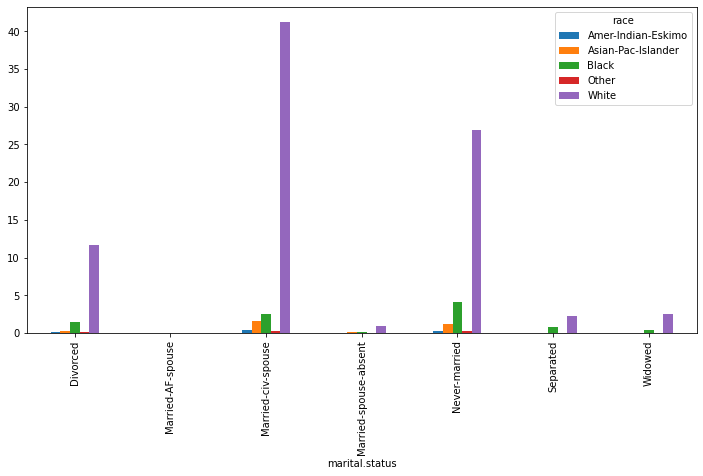

In [727]:
tab_freq_mat_cor.plot(kind='bar')

# Podemos fazer agrupamentos e depois analisar estatísticas descritivas 

In [728]:
grupo_cor = dados.groupby('race')
grupo_cor

In [729]:
for race, dados in grupo_cor: 
    print(race)

Amer-Indian-Eskimo
Asian-Pac-Islander
Black
Other
White


In [730]:
grupo_idade = dados.groupby('age')
grupo_idade

In [ ]:
for age, dados in grupo_idade: 
    print('{} -> {}'.format(age, dados['hours.per.week'].mean()))

## Abaixo, temos a média de horas trabalhadas por semana X idade

In [731]:
for age, dados in grupo_idade: 
    print('{} -> {}'.format(age, dados['hours.per.week'].mean()))

17 -> 20.882521489971346
18 -> 25.89648033126294
19 -> 30.68095238095238
20 -> 32.36600306278714
21 -> 34.58054226475279
22 -> 35.38425925925926
23 -> 37.20164609053498
24 -> 39.468277945619334
25 -> 40.21923620933522
26 -> 41.29783950617284
27 -> 42.695526695526695
28 -> 42.36223776223776
29 -> 42.64776119402985
30 -> 42.500693481276
31 -> 43.125836680053546
32 -> 43.311522048364154
33 -> 43.56944444444444
34 -> 43.37234042553192
35 -> 44.375170532060025
36 -> 43.6605504587156
37 -> 44.16395663956639
38 -> 44.4555712270804
39 -> 44.14782608695652
40 -> 42.67883211678832
41 -> 43.37865497076023
42 -> 43.61573373676248
43 -> 43.39692307692307
44 -> 44.49588138385502
45 -> 43.84201954397394
46 -> 43.085443037974684
47 -> 43.49419568822554
48 -> 43.82875264270613
49 -> 44.01968503937008
50 -> 44.206896551724135
51 -> 43.627184466019415
52 -> 43.51190476190476
53 -> 44.02577319587629
54 -> 43.002724795640326
55 -> 42.69505494505494
56 -> 42.15987460815047
57 -> 42.709150326797385
58 -> 41.

## dá pra ver como as pessoas começam trabalhando menos, tem seu pico de trabalho entre os 25 e os 60 anos de idade e depois começam a trabalhar menos